# Apartment for Rent Classified Dataset Cleaning and Data Exploration

## Data Cleaning

In [1]:
# data source: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
apartment_for_rent_classified = fetch_ucirepo(id=555) 
  
# data (as pandas dataframes) 
df = apartment_for_rent_classified.data.features 

c:\Users\david\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [5]:
df.shape

(99826, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   39192 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [7]:
df.isnull().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           66
bedrooms           127
currency             4
fee                  3
has_photo            3
pets_allowed     60634
price                5
price_display        6
price_type           3
square_feet          3
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

In [8]:
# Lets drop the 'amenities', 'pets_allowed', and 'address' columns
df = df.drop(columns=['amenities', 'pets_allowed', 'address'])

In [9]:
df['fee'].value_counts()

fee
No      99619
Yes       201
1380        1
2150        1
1019        1
Name: count, dtype: int64

In [10]:
# Lets only use rows where 'fee' equals 'No'
df = df[df['fee'] == 'No']

# And lets drop the 'fee' column since all instances are 'No'
df = df.drop(columns=['fee'])

In [11]:
df['currency'].value_counts()

# Lets drop the 'currency' column since all prices are in USD
df = df.drop(columns=['currency'])

In [12]:
# Lets drop columns 'title' and 'body' as they are not useful for the ML we will build
df = df.drop(columns=['title','body'])

In [13]:
df[['price', 'price_display']]

,price,price_display
0,2195.0,2195
1,1250.0,1250
2,1395.0,1395
3,1600.0,1600
4,975.0,975
...,...,...
99821,780.0,780
99822,813.0,813
99823,1325.0,1325
99824,931.0,931


In [14]:
# Lets drop the price_display column as it gives us the same info as the 'price' column
df = df.drop(columns=['price_display'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99619 entries, 0 to 99825
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     99619 non-null  object 
 1   bathrooms    99556 non-null  object 
 2   bedrooms     99499 non-null  object 
 3   has_photo    99619 non-null  object 
 4   price        99618 non-null  float64
 5   price_type   99619 non-null  object 
 6   square_feet  99619 non-null  object 
 7   cityname     99317 non-null  object 
 8   state        99317 non-null  object 
 9   latitude     99594 non-null  float64
 10  longitude    99594 non-null  float64
 11  source       99619 non-null  object 
 12  time         99619 non-null  float64
dtypes: float64(4), object(9)
memory usage: 10.6+ MB


In [16]:
# We can also drop the 'has_photo', 'source', and 'time' columns as they do not give us info for the ML models
df = df.drop(columns=['has_photo', 'source', 'time'])

In [17]:
df['price_type'].value_counts() 

price_type
Monthly           99615
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64

In [18]:
# Lets only use rows where 'price_type' equals 'Monthly'
df = df[df['price_type'] == 'Monthly']

# And lets drop the 'fee' column since all instances are 'No'
df = df.drop(columns=['price_type'])

In [19]:
df['category'].value_counts()

category
housing/rent/apartment            99554
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

In [20]:
# Lets only use rows where 'category' equals 'housing/rent/apartment'
df = df[df['category'] == 'housing/rent/apartment']

# And lets drop the 'category' column since all instances are 'housing/rent/apartment'
df = df.drop(columns=['category'])

In [21]:
df.isnull().sum()

bathrooms       61
bedrooms       119
price            1
square_feet      0
cityname       302
state          302
latitude        25
longitude       25
dtype: int64

In [22]:
# Lets drop the rows with null values as they are just a few 
print("Shape before removing rows with null values:" ,df.shape)

# Removing the rows with null values
df= df.dropna()
print("Shape after removing rows with null values:" ,df.shape)


Shape before removing rows with null values: (99554, 8)
Shape after removing rows with null values: (99075, 8)


In [23]:
df.isnull().sum()

bathrooms      0
bedrooms       0
price          0
square_feet    0
cityname       0
state          0
latitude       0
longitude      0
dtype: int64

In [24]:
df['bathrooms'].value_counts()

bathrooms
1      55208
2      35944
1.5     3119
2.5     2017
3        870
1.0      811
2.0      597
3.5      201
4        115
2.5       48
4.5       41
1.5       38
5         20
3.0       16
6          8
3.5        5
5.5        4
4.0        4
7          3
8          2
7.5        1
9          1
8.5        1
4.5        1
Name: count, dtype: int64

In [25]:
df['bathrooms'] = df['bathrooms'].astype(float)

In [26]:
df['bathrooms'].value_counts()

bathrooms
1.0    56019
2.0    36541
1.5     3157
2.5     2065
3.0      886
3.5      206
4.0      119
4.5       42
5.0       20
6.0        8
5.5        4
7.0        3
8.0        2
8.5        1
9.0        1
7.5        1
Name: count, dtype: int64

In [27]:
# Since there are just a few apartments with more than 4 bathrooms, lets remove those outliers 
df = df[df['bathrooms'] <= 4]

In [28]:
df['bedrooms'].value_counts()

bedrooms
2      45207
1      39573
3      10358
4       1423
2.0      689
1.0      640
0        634
5        248
3.0      148
4.0       34
6         27
0.0        4
8          3
5.0        3
7          1
6.0        1
Name: count, dtype: int64

In [29]:
df['bedrooms'] = df['bedrooms'].astype(float)

In [30]:
df['bedrooms'].value_counts()

bedrooms
2.0    45896
1.0    40213
3.0    10506
4.0     1457
0.0      638
5.0      251
6.0       28
8.0        3
7.0        1
Name: count, dtype: int64

In [31]:
# We can remove the apartments with more than 5 bedrooms
df = df[df['bedrooms'] <= 4]


In [32]:
df['bedrooms'].value_counts()

bedrooms
2.0    45896
1.0    40213
3.0    10506
4.0     1457
0.0      638
Name: count, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98710 entries, 0 to 99825
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    98710 non-null  float64
 1   bedrooms     98710 non-null  float64
 2   price        98710 non-null  float64
 3   square_feet  98710 non-null  object 
 4   cityname     98710 non-null  object 
 5   state        98710 non-null  object 
 6   latitude     98710 non-null  float64
 7   longitude    98710 non-null  float64
dtypes: float64(5), object(3)
memory usage: 6.8+ MB


In [34]:
df['square_feet'] = df['square_feet'].astype(float)

In [35]:
df['state'].nunique()

51

In [36]:
df['state'].unique()

array(['CA', 'VA', 'NC', 'NM', 'CO', 'WV', 'GA', 'MA', 'DC', 'AZ', 'IA',
       'WA', 'TX', 'IL', 'MS', 'OR', 'FL', 'MO', 'PA', 'WI', 'OK', 'UT',
       'RI', 'NJ', 'IN', 'MD', 'OH', 'TN', 'ND', 'NE', 'AR', 'MI', 'MN',
       'HI', 'ID', 'SC', 'KS', 'AL', 'SD', 'NY', 'KY', 'LA', 'AK', 'CT',
       'NV', 'WY', 'VT', 'NH', 'MT', 'DE', 'ME'], dtype=object)

In [37]:
df['cityname'].nunique()

2956

In [38]:
# Lets rename the 'cityname' column to 'city'
df.rename(columns={'cityname': 'city'}, inplace=True)

In [39]:
# Lets add a 'region' column

# Define the state to region mapping
state_region_map = {
    "Northeast": ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"],
    "Midwest": ["IL", "IN", "MI", "OH", "WI", "IA", "KS", "MN", "MO", "NE", "ND", "SD"],
    "South": ["DE", "FL", "GA", "MD", "NC", "SC", "VA", "DC", "WV", "AL", "KY", "MS", "TN", "AR", "LA", "OK", "TX"],
    "West": ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY", "AK", "CA", "HI", "OR", "WA"]
}

# Create a reverse lookup dictionary
state_to_region_map = {state: region for region, states in state_region_map.items() for state in states}

# Function to get region from state
def state_to_region(state):
    return state_to_region_map.get(state, 'Unknown')

# Create a new column 'region' by applying the state_to_region function to each row in the 'state' column
df['region'] = df['state'].apply(state_to_region)

In [40]:
df['region'].value_counts()

region
South        48016
West         25629
Northeast    12666
Midwest      12399
Name: count, dtype: int64

In [41]:
df.head()

,bathrooms,bedrooms,price,square_feet,city,state,latitude,longitude,region
0,1.0,1.0,2195.0,542.0,Redondo Beach,CA,33.8520,-118.3759,West
1,1.5,3.0,1250.0,1500.0,Newport News,VA,37.0867,-76.4941,South
2,2.0,3.0,1395.0,1650.0,Raleigh,NC,35.8230,-78.6438,South
3,1.0,2.0,1600.0,820.0,Vacaville,CA,38.3622,-121.9712,West
4,1.0,1.0,975.0,624.0,Albuquerque,NM,35.1038,-106.6110,West


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98710 entries, 0 to 99825
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bathrooms    98710 non-null  float64
 1   bedrooms     98710 non-null  float64
 2   price        98710 non-null  float64
 3   square_feet  98710 non-null  float64
 4   city         98710 non-null  object 
 5   state        98710 non-null  object 
 6   latitude     98710 non-null  float64
 7   longitude    98710 non-null  float64
 8   region       98710 non-null  object 
dtypes: float64(6), object(3)
memory usage: 7.5+ MB


In [43]:
df.isnull().sum()

bathrooms      0
bedrooms       0
price          0
square_feet    0
city           0
state          0
latitude       0
longitude      0
region         0
dtype: int64

## Data Exploration

In [44]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude
count,98710.000000,98710.000000,98710.00000,98710.000000,98710.000000,98710.000000
mean,1.439089,1.715642,1513.71166,948.105663,36.933054,-91.555631
std,0.530097,0.719624,821.96105,332.556877,4.600106,15.811212
min,1.000000,0.000000,200.00000,107.000000,19.666000,-159.369800
25%,1.000000,1.000000,1011.00000,729.000000,33.743500,-104.809900
50%,1.000000,2.000000,1350.00000,900.000000,37.205400,-84.549400
75%,2.000000,2.000000,1785.00000,1113.000000,39.951300,-77.606600
max,4.000000,4.000000,52500.00000,12000.000000,64.833200,-68.778800


 <h4>Bathrooms</h4>
    <ul>
        <li><strong>Count</strong>: 98,710 data points for the number of bathrooms.</li>
        <li><strong>Mean</strong>: On average, apartments have about 1.44 bathrooms.</li>
        <li><strong>Standard Deviation</strong>: The number of bathrooms varies by about 0.53 from the mean, indicating moderate variability.</li>
        <li><strong>Range</strong>: The number of bathrooms ranges from 1 to 4.
            <ul>
                <li><strong>Minimum</strong>: The smallest apartments have at least 1 bathroom.</li>
                <li><strong>25th Percentile</strong>: 25% of apartments have 1 bathroom or fewer.</li>
                <li><strong>Median (50th Percentile)</strong>: 50% of apartments have 1 bathroom.</li>
                <li><strong>75th Percentile</strong>: 75% of apartments have 2 bathrooms or fewer.</li>
                <li><strong>Maximum</strong>: The largest apartments have up to 4 bathrooms.</li>
            </ul>
        </li>
    </ul>

<h4>Bedrooms</h4>
    <ul>
        <li><strong>Count</strong>: 98,710 data points for the number of bedrooms.</li>
        <li><strong>Mean</strong>: Apartments typically have around 1.72 bedrooms.</li>
        <li><strong>Standard Deviation</strong>: The number of bedrooms varies by about 0.72 from the mean, showing moderate variability.</li>
        <li><strong>Range</strong>: The number of bedrooms ranges from 0 to 4.
            <ul>
                <li><strong>Minimum</strong>: Some apartments have no bedrooms (likely studio apartments).</li>
                <li><strong>25th Percentile</strong>: 25% of apartments have 1 bedroom or fewer.</li>
                <li><strong>Median (50th Percentile)</strong>: 50% of apartments have 2 bedrooms.</li>
                <li><strong>75th Percentile</strong>: 75% of apartments have 2 bedrooms or fewer.</li>
                <li><strong>Maximum</strong>: The largest apartments have up to 4 bedrooms.</li>
            </ul>
        </li>
    </ul>

<h4>Price</h4>
    <ul>
        <li><strong>Count</strong>: 98,710 price data points.</li>
        <li><strong>Mean</strong>: The average rent price is approximately $1,513.71.</li>
        <li><strong>Standard Deviation</strong>: Prices vary widely with a standard deviation of $821.96.</li>
        <li><strong>Range</strong>: Rent prices span from $200 to $52,500.
            <ul>
                <li><strong>Minimum</strong>: The cheapest apartments are priced at $200.</li>
                <li><strong>25th Percentile</strong>: 25% of apartments are priced at $1,011 or less.</li>
                <li><strong>Median (50th Percentile)</strong>: The median price is $1,350.</li>
                <li><strong>75th Percentile</strong>: 75% of apartments are priced at $1,785 or less.</li>
                <li><strong>Maximum</strong>: The most expensive apartments can reach up to $52,500, indicating luxury or high-end apartments.</li>
            </ul>
        </li>
    </ul>

<h4>Square Feet</h4>
    <ul>
        <li><strong>Count</strong>: 98,710 data points for square footage.</li>
        <li><strong>Mean</strong>: The average apartment size is about 948.11 square feet.</li>
        <li><strong>Standard Deviation</strong>: Sizes vary by about 332.56 square feet, showing significant variability.</li>
        <li><strong>Range</strong>: Apartment sizes range from 107 to 12,000 square feet.
            <ul>
                <li><strong>Minimum</strong>: The smallest apartments are 107 square feet.</li>
                <li><strong>25th Percentile</strong>: 25% of apartments are 729 square feet or smaller.</li>
                <li><strong>Median (50th Percentile)</strong>: The median size is 900 square feet.</li>
                <li><strong>75th Percentile</strong>: 75% of apartments are 1,113 square feet or smaller.</li>
                <li><strong>Maximum</strong>: The largest apartments are up to 12,000 square feet, likely indicating penthouses or large luxury units.</li>
            </ul>
        </li>
    </ul>

<h4>Latitude</h4>
    <ul>
        <li><strong>Count</strong>: 98,710 data points for latitude.</li>
        <li><strong>Mean</strong>: The average latitude is 36.93, which places the apartments generally in the southern half of the United States.</li>
        <li><strong>Standard Deviation</strong>: The latitudes vary by 4.60 degrees, indicating a broad geographic distribution.</li>
        <li><strong>Range</strong>: Latitudes range from 19.67 to 64.83.
            <ul>
                <li><strong>Minimum</strong>: The southernmost apartments are at 19.67 degrees latitude.</li>
                <li><strong>25th Percentile</strong>: 25% of apartments are located at or below 33.74 degrees latitude.</li>
                <li><strong>Median (50th Percentile)</strong>: The median latitude is 37.21 degrees.</li>
                <li><strong>75th Percentile</strong>: 75% of apartments are located at or below 39.95 degrees latitude.</li>
                <li><strong>Maximum</strong>: The northernmost apartments are at 64.83 degrees latitude.</li>
            </ul>
        </li>
    </ul>

<h4>Longitude</h4>
    <ul>
        <li><strong>Count</strong>: 98,710 data points for longitude.</li>
        <li><strong>Mean</strong>: The average longitude is -91.56, placing the apartments generally in the central to eastern United States.</li>
        <li><strong>Standard Deviation</strong>: Longitudes vary by 15.81 degrees, indicating a wide geographic spread.</li>
        <li><strong>Range</strong>: Longitudes range from -159.37 to -68.78.
            <ul>
                <li><strong>Minimum</strong>: The westernmost apartments are at -159.37 degrees longitude.</li>
                <li><strong>25th Percentile</strong>: 25% of apartments are located at or below -104.81 degrees longitude.</li>
                <li><strong>Median (50th Percentile)</strong>: The median longitude is -84.55 degrees.</li>
                <li><strong>75th Percentile</strong>: 75% of apartments are located at or below -77.61 degrees longitude.</li>
                <li><strong>Maximum</strong>: The easternmost apartments are at -68.78 degrees longitude.</li>
            </ul>
        </li>
    </ul>

c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

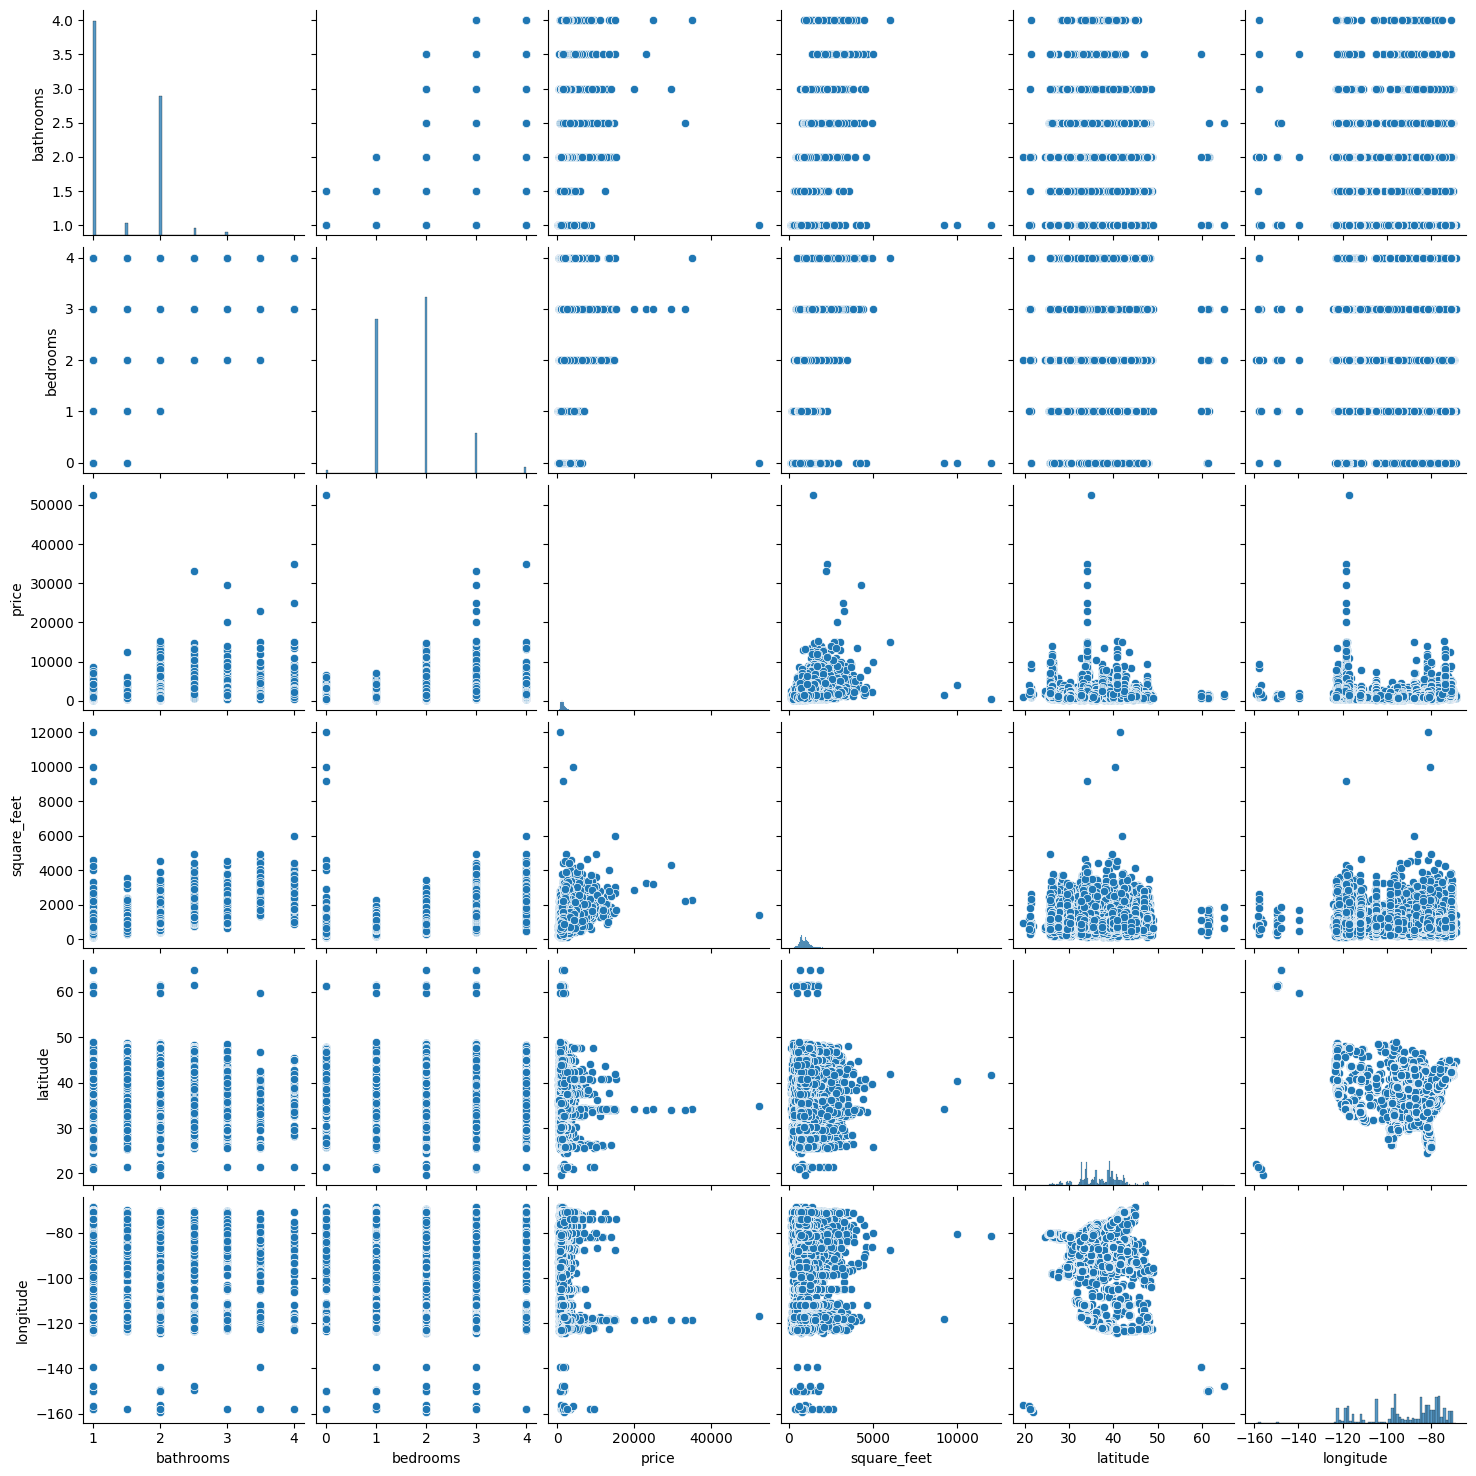

In [56]:
sns.pairplot(data = df)

c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

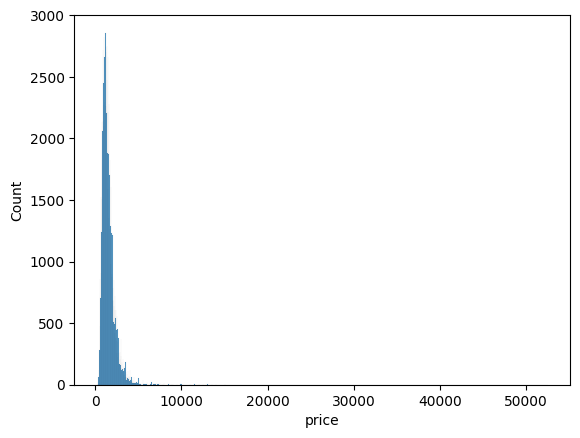

In [45]:
# Lets check the price distribution

sns.histplot(data = df, x = df['price'])

There seem to be a few apartments skewing the distribution to the right. Lets see if we loose a lot of info by removing the outliers.

In [46]:
# Function to remove outliers (points outside of the IQ range)

def take_outliers(df, column):
    # Calculate the first quartile (Q1) and third quartile (Q3) of the price data
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds to filter out outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out prices outside of the IQR range
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print("Original DataFrame:")
    print(df.shape)
    print("\nFiltered DataFrame (prices within the IQR range):")
    print(filtered_df.shape)
    return filtered_df

In [47]:
filtered_df = take_outliers(df,'price')

Original DataFrame:
(98710, 9)

Filtered DataFrame (prices within the IQR range):
(94131, 9)


It looks like we do not lose much info, so we can remove the outliers from the 'price' column.

c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

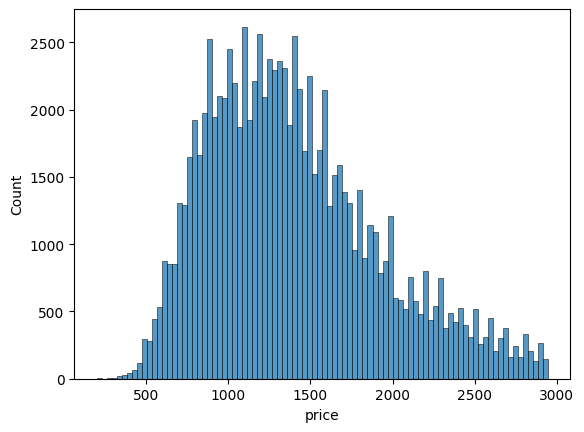

In [48]:
sns.histplot(data = filtered_df, x = filtered_df['price'])

Now it looks more normally distributed. 

Lets check the square_feet column distribution to see if we can do the same thing.

c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='square_feet', ylabel='Count'>

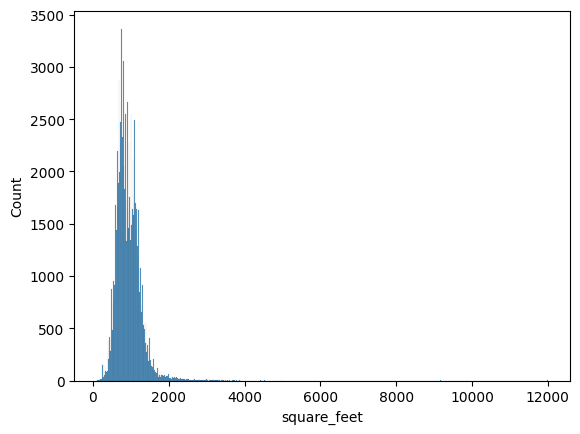

In [49]:
sns.histplot(data = filtered_df, x = filtered_df['square_feet'])

In [50]:
filtered_df = take_outliers(filtered_df,'square_feet')

Original DataFrame:
(94131, 9)

Filtered DataFrame (prices within the IQR range):
(92097, 9)


c:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='square_feet', ylabel='Count'>

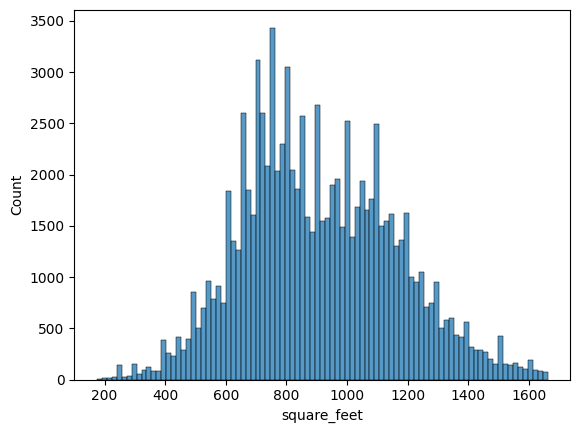

In [51]:
sns.histplot(data = filtered_df, x = filtered_df['square_feet'])

Now our square_feet distribution is normally distributed, and we still have more than 92,000 rows. 

In [52]:
filtered_df_numeric = filtered_df.select_dtypes(include='number')

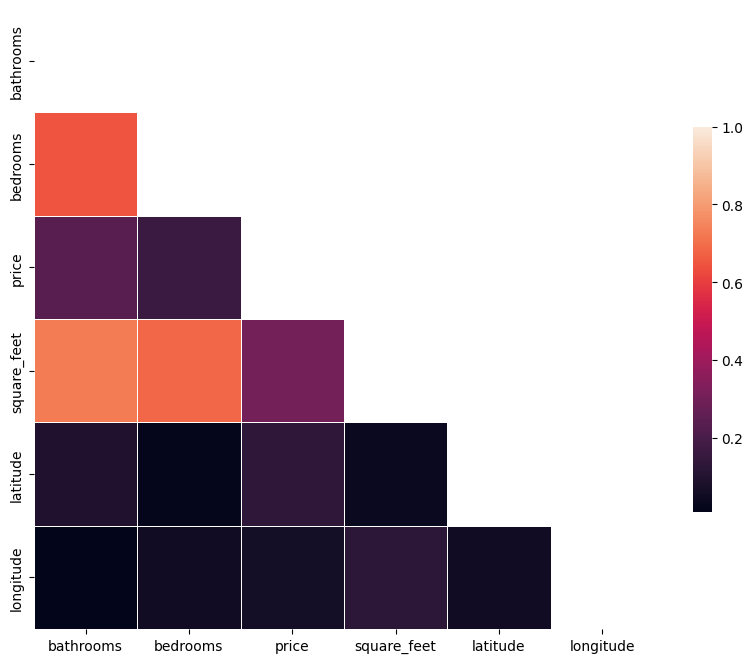

In [53]:
corr=np.abs(filtered_df_numeric.corr())

#Set up mask for triangle representation (so it only shows one side)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [54]:
corr

,bathrooms,bedrooms,price,square_feet,latitude,longitude
bathrooms,1.000000,0.644877,0.240504,0.727150,0.092033,0.010644
bedrooms,0.644877,1.000000,0.162250,0.685826,0.021087,0.056819
price,0.240504,0.162250,1.000000,0.301701,0.132009,0.062090
square_feet,0.727150,0.685826,0.301701,1.000000,0.034603,0.127222
latitude,0.092033,0.021087,0.132009,0.034603,1.000000,0.056306
longitude,0.010644,0.056819,0.062090,0.127222,0.056306,1.000000


### Correlation Analysis

Bathrooms and Bedrooms:

* There is a strong positive correlation (0.645) between the number of bathrooms and bedrooms. This indicates that houses with more bathrooms tend to have more bedrooms.

Bathrooms and Square Feet:

* A strong positive correlation (0.727) exists between the number of bathrooms and the square footage of the house. Larger houses tend to have more bathrooms.

Bedrooms and Square Feet:

* Similarly, there is a strong positive correlation (0.686) between the number of bedrooms and square footage, suggesting that larger homes generally have more bedrooms.

Price and Square Feet:

* The correlation between price and square footage is moderately positive (0.302). This indicates that larger houses tend to be more expensive, but the relationship is not extremely strong.

Price and Bathrooms:

* The correlation between price and the number of bathrooms is 0.241, indicating a weak positive relationship. Houses with more bathrooms tend to have higher prices, but this is not a very strong predictor.

Price and Bedrooms:

* There is a weak positive correlation (0.162) between price and the number of bedrooms. More bedrooms generally correlate with higher prices, but again, this is not a strong predictor.

Latitude and Longitude:

* Latitude and longitude have very low correlations with other variables. The highest correlation is between longitude and square footage (0.127), which is still quite weak. This suggests that geographical location (in terms of latitude and longitude) is not strongly related to these other housing characteristics in this dataset.

Latitude and Price:

* Latitude has a weak positive correlation with price (0.132), implying a slight relationship between the north-south position of a property and its price.

Overall, the number of bathrooms and bedrooms shows strong intercorrelations and both are strongly related to the size of the house (square feet). However, their direct correlation with price is relatively weak, indicating that while they are related to larger house size, other factors likely play a significant role in determining house prices. Latitude and longitude, representing geographic location, do not show strong correlations with the other variables, suggesting that in this dataset, the spatial positioning of houses has less impact on these characteristics.

In [55]:
# Converting filtered_df to pickle
# filtered_df.to_pickle('cleaned_apartment_df.pkl')

In [79]:
# Converting it to a csv file
#filtered_df.to_csv('cleaned_apartment_df.csv')